In [2]:
import pandas as pd
import numpy as np
import os
import nltk.data
from nltk import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

from sklearn.neighbors import NearestNeighbors
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_colwidth', 250)

C:\Users\Enric\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [6]:
print (os.listdir('../../Data/'))

['compras_clientes.csv', 'Images', 'Productos_Finales', 'Texto_PreProcesado_v1.csv']


In [7]:
path = os.path.join('../../Data/')

In [8]:
data = pd.read_csv(path + 'Texto_PreProcesado_v1.csv', sep = ';', index_col = False)

In [9]:
data.head()

,id,brand,text
0,1060651400131,Woman_Limited_El_Corte_Inglés,moda mujer abrigo masculino textura
1,1060651400180,Woman_Limited_El_Corte_Inglés,moda mujer abrigo doble faz cinturon tono
2,1051056400107,Woman_El_Corte_Inglés,moda mujer abrigo largo antelina woman corte_ingles
3,1019350401147,Lloyd's,moda mujer abrigo chaqueta termica efecto cortavientos
4,1019353400229,Lloyd's,moda mujer abrigo parka algodon capucha


In [5]:
EMBEDDING_DIM = 100

In [7]:
sentences = [word.split() for word in data['text'].values]
sentences[:3]

len(sentences)

204812

## Generate Word2Vec Embedding

In [8]:
%%time
modelWV = Word2Vec(sentences, workers = 2, min_count=5, window = 10, size = EMBEDDING_DIM)
modelWV.train(sentences, total_examples=len(sentences), epochs=20)

Wall time: 1min 7s


In [9]:
modelWV.save("word2vec_model_v2")

In [11]:
model = Word2Vec.load("word2vec_model_v2")

### Let's test the Embedding

In [18]:
wl = 'bufanda'
modelWV.wv.most_similar (positive = wl)

[('estola', 0.631831169128418),
 ('invierno', 0.5619574189186096),
 ('corbata', 0.5533325672149658),
 ('panuelo', 0.5433658361434937),
 ('guante', 0.5428837537765503),
 ('boina', 0.5405052900314331),
 ('coletero', 0.5135939121246338),
 ('gorro', 0.5011366605758667),
 ('pajarita', 0.497850626707077),
 ('sombrero', 0.49148687720298767)]

In [21]:
def similar_products(text):
    list_text = text.split()
    most_similar = modelWV.wv.most_similar_cosmul(positive = list_text)
    
    return most_similar
    
similar_products('cable hdmi 1m')

[('vga', 0.4276890456676483),
 ('optix', 0.41249147057533264),
 ('ultrapanoramico', 0.3922581672668457),
 ('hubs', 0.38271114230155945),
 ('1920x1080', 0.379360556602478),
 ('n3060', 0.37646201252937317),
 ('retroiluminado', 0.37579819560050964),
 ('330s15', 0.37459027767181396),
 ('conexion', 0.37084850668907166),
 ('dvi', 0.36873140931129456)]

### Lets Study the impact of NumWords

In [22]:
%%time
vectorizer = CountVectorizer(tokenizer = word_tokenize)
transformed_data = vectorizer.fit_transform(data.text)
word_count = transformed_data.sum(axis = 0)

Wall time: 1min 3s


0.7775484158581962
0.9188058804681164
0.9531338490342268
0.9865114597170005


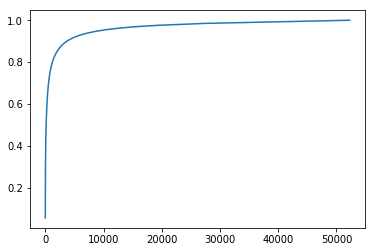

In [29]:
wc = np.array(word_count)[0]
idx = np.argsort(wc)[::-1]

percentages = np.zeros(len(wc))

for i, idx_ in enumerate(idx):
    percentages[i] = wc[idx_]

percentages_cumsum = percentages.cumsum()/percentages.sum()

plt.plot(percentages_cumsum)

print (percentages_cumsum[1000])
print (percentages_cumsum[5000])
print (percentages_cumsum[10000])
print (percentages_cumsum[30000])
